# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [2]:
data = pd.read_csv('data.csv')
#print(data[:20])
plans_universitypast_failures = data['plans_universitypast_failures']
data = data.drop(['plans_universitypast_failures'], axis = 1)
a, b = [], []
for i in plans_universitypast_failures:
    z = abs(i) // i
    a.append((abs(i) // 10) % 2 * z)
    b.append((abs(i) % 10) % 5)
data['plans_university'] = a
data['past_failures'] = b
data[:20]

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
0,16,4,4,1,2,5,4,4.0,1.0,2.0,5,1,1,0,1,1,1,0
1,17,4,4,1,1,5,3,4.0,1.0,2.0,5,0,1,0,1,1,1,0
2,16,1,1,2,1,4,5,5.0,2.0,4.0,5,1,0,1,1,1,1,0
3,18,1,2,2,1,3,4,4.0,2.0,4.0,4,1,1,0,1,0,-1,0
4,17,2,1,2,2,4,2,5.0,1.0,2.0,5,0,0,0,1,1,1,0
5,17,2,4,1,2,4,3,2.0,1.0,1.0,5,0,1,1,1,1,1,0
6,15,1,1,3,2,4,2,1.0,1.0,2.0,2,0,0,0,1,1,1,0
7,15,3,3,1,4,4,3,3.0,1.0,1.0,4,0,1,0,0,1,1,0
8,19,1,1,3,1,4,4,4.0,3.0,3.0,5,1,0,0,1,1,1,1
9,17,1,1,1,3,4,3,2.0,1.0,2.0,4,0,1,1,1,1,1,0


### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

__(+1 балл)__

Дополнительно сравните качество замены на среднее по столбцу и на медиану по столбцу


*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [3]:
#data = data.replace(np.NAN, data.mean())

In [4]:
№data = data.replace(np.NAN, data.median())

### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [5]:
data = (data - data.min()) / (data.max() - data.min())
data[:5]

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
0,0.000506,1.00,1.00,0.000000,0.333333,1.00,0.75,0.75,0.00,0.25,1.00,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,0.001012,1.00,1.00,0.000000,0.000000,1.00,0.50,0.75,0.00,0.25,1.00,0.0,1.0,0.0,1.0,1.0,1.0,0.0
2,0.000506,0.25,0.25,0.020408,0.000000,0.75,1.00,1.00,0.25,0.75,1.00,1.0,0.0,1.0,1.0,1.0,1.0,0.0
3,0.001518,0.25,0.50,0.020408,0.000000,0.50,0.75,0.75,0.25,0.75,0.75,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.001012,0.50,0.25,0.020408,0.333333,0.75,0.25,1.00,0.00,0.25,1.00,0.0,0.0,0.0,1.0,1.0,1.0,0.0


### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [25]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [26]:
scores = pd.read_csv('scores.csv')
l = LinearRegression()
result = cross_val_score(l, data[1:], scores)
print(result, sum(result) / len(result))

[0.18611367 0.26741999 0.14797128 0.27097429 0.13524496] 0.20154483845126156


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Попробуйте несколько способов добавления полных данных

In [27]:
school_support = open("school_support.txt").readlines()
data['school_suport'] = 0
for i in school_support:
    data['school_suport'][int(i)] += 1

/var/folders/vb/1jpw8q5j7wq2fm0t1yswkvt80000gn/T/ipykernel_18098/1328596775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['school_suport'][int(i)] += 1
/var/folders/vb/1jpw8q5j7wq2fm0t1yswkvt80000gn/T/ipykernel_18098/1328596775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['school_suport'][int(i)] += 1
/var/folders/vb/1jpw8q5j7wq2fm0t1yswkvt80000gn/T/ipykernel_18098/1328596775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [28]:
attendance = pd.read_csv("attendance.csv")
a = []
for i in attendance['0;1;2;3;4;5;6;7;8;9;10;11;12;13;14;15;16;17;18;19;20;21;22;23;24;25;26;27;28;29;30;31']:
    a.append(i.count('+'))
data["attendance"] = a

In [29]:
data[:20]

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,school_suport,attendance
0,0.000506,1.00,1.00,0.000000,0.333333,1.00,0.75,0.75,0.00,0.25,1.00,1.0,1.0,0.0,1.0,1.0,1.0,0.000000,0,26
1,0.001012,1.00,1.00,0.000000,0.000000,1.00,0.50,0.75,0.00,0.25,1.00,0.0,1.0,0.0,1.0,1.0,1.0,0.000000,0,30
2,0.000506,0.25,0.25,0.020408,0.000000,0.75,1.00,1.00,0.25,0.75,1.00,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,0,32
3,0.001518,0.25,0.50,0.020408,0.000000,0.50,0.75,0.75,0.25,0.75,0.75,1.0,1.0,0.0,1.0,0.0,0.0,0.000000,0,22
4,0.001012,0.50,0.25,0.020408,0.333333,0.75,0.25,1.00,0.00,0.25,1.00,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,0,32
5,0.001012,0.50,1.00,0.000000,0.333333,0.75,0.50,0.25,0.00,0.00,1.00,0.0,1.0,1.0,1.0,1.0,1.0,0.000000,0,24
6,0.000000,0.25,0.25,0.040816,0.333333,0.75,0.25,0.00,0.00,0.25,0.25,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,0,32
7,0.000000,0.75,0.75,0.000000,1.000000,0.75,0.50,0.50,0.00,0.00,0.75,0.0,1.0,0.0,0.0,1.0,1.0,0.000000,1,22
8,0.002024,0.25,0.25,0.040816,0.000000,0.75,0.75,0.75,0.50,0.50,1.00,1.0,0.0,0.0,1.0,1.0,1.0,0.333333,0,28
9,0.001012,0.25,0.25,0.000000,0.666667,0.75,0.50,0.25,0.00,0.25,0.75,0.0,1.0,1.0,1.0,1.0,1.0,0.000000,0,22


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

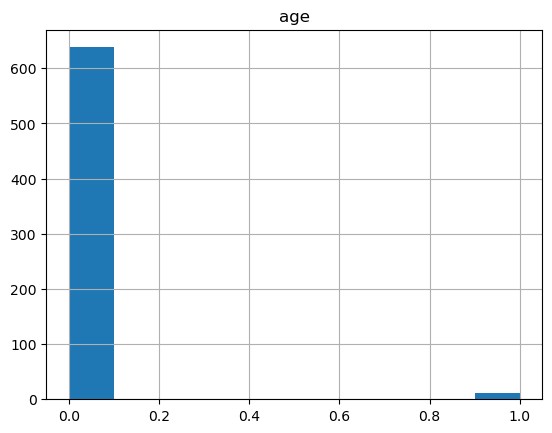

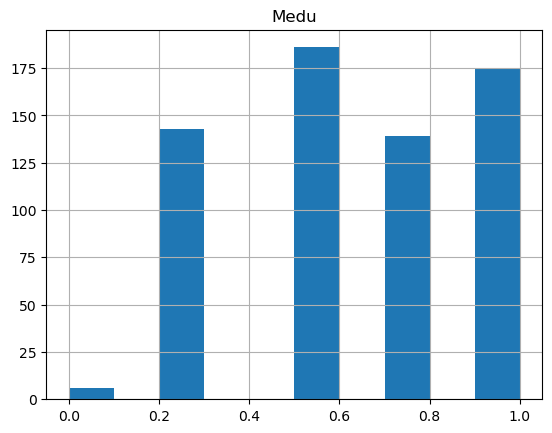

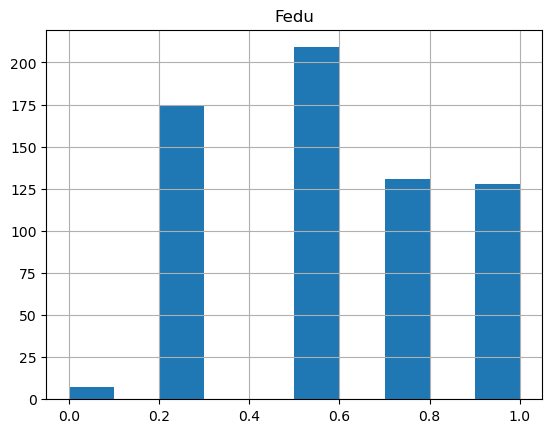

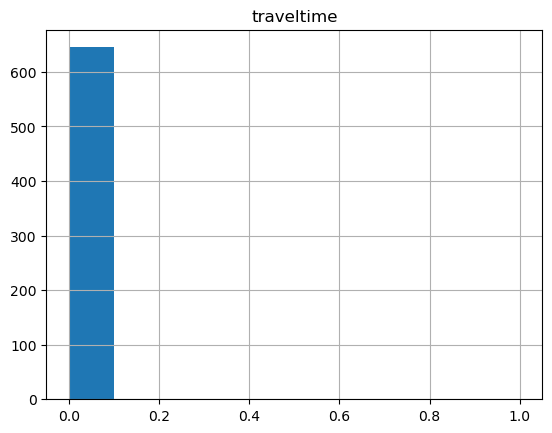

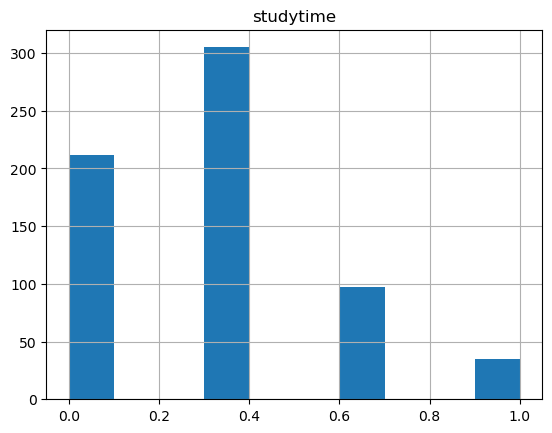

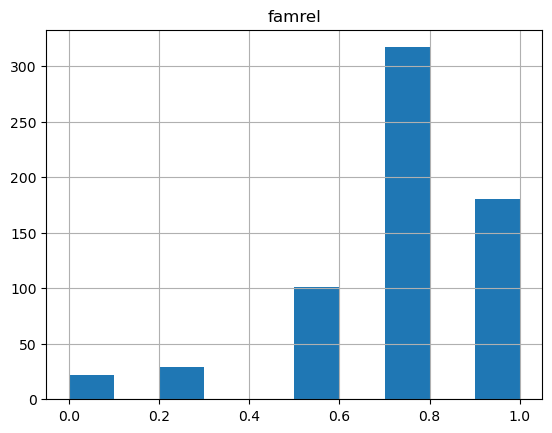

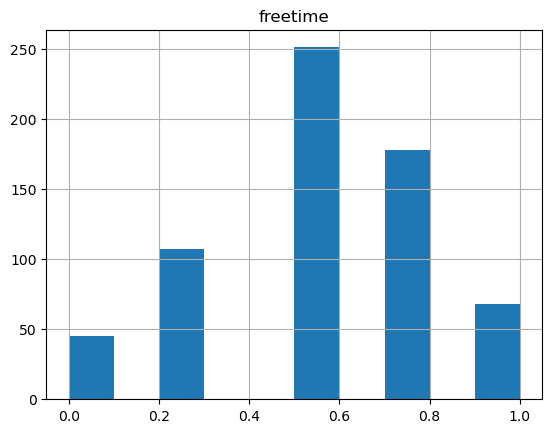

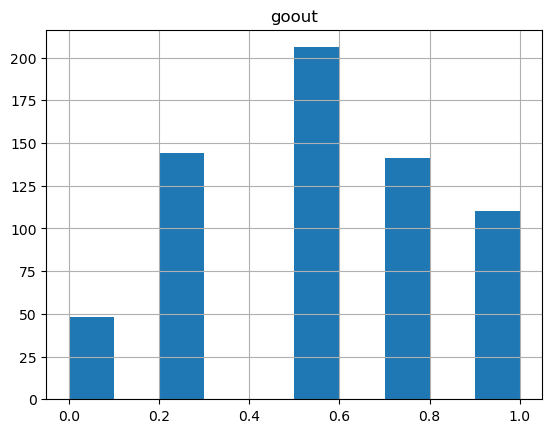

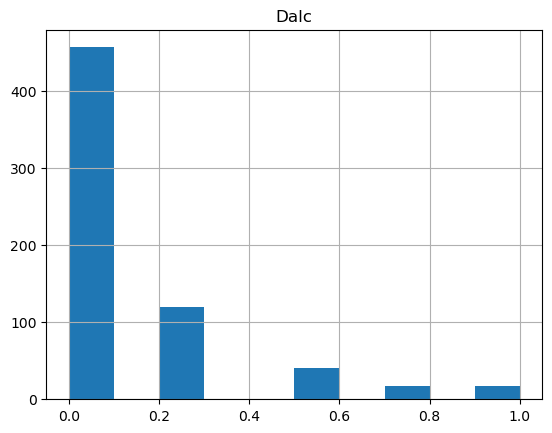

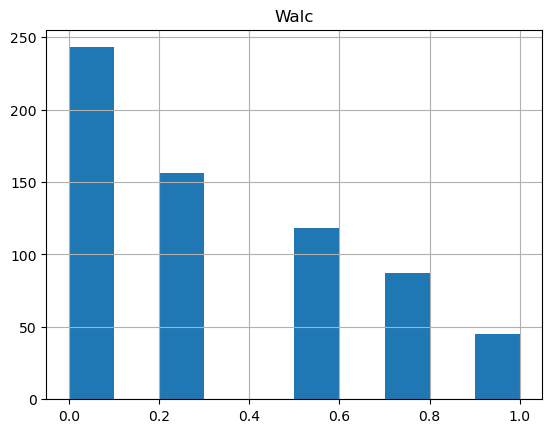

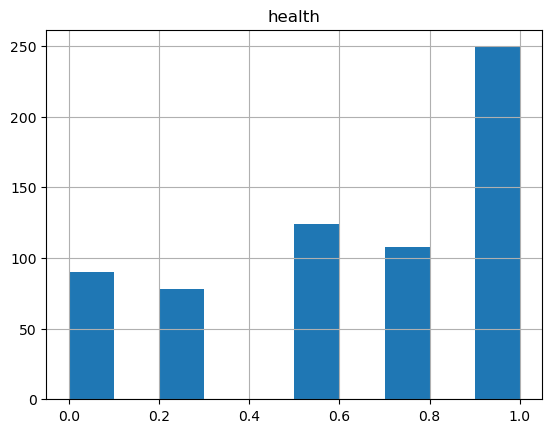

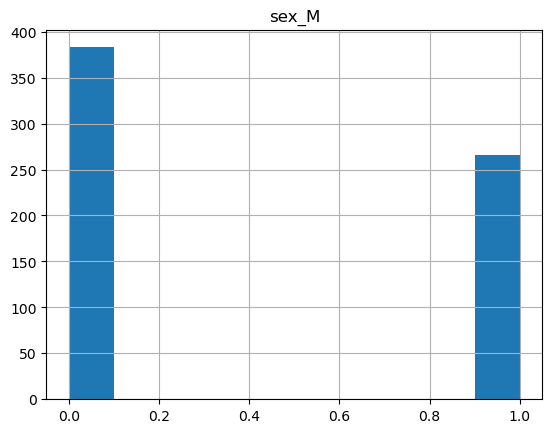

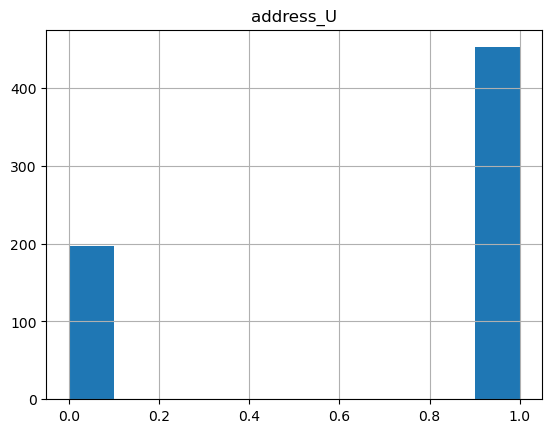

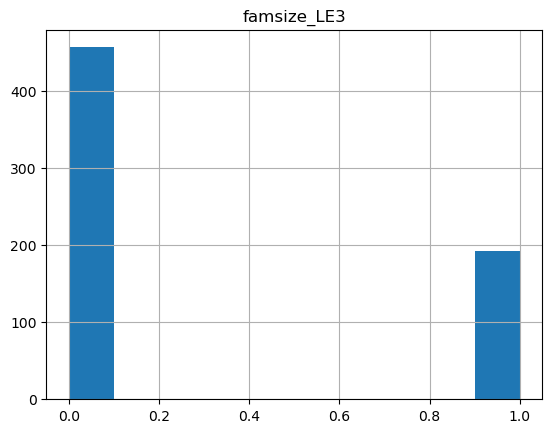

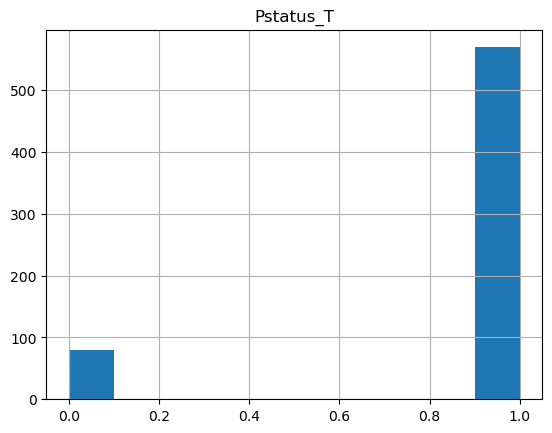

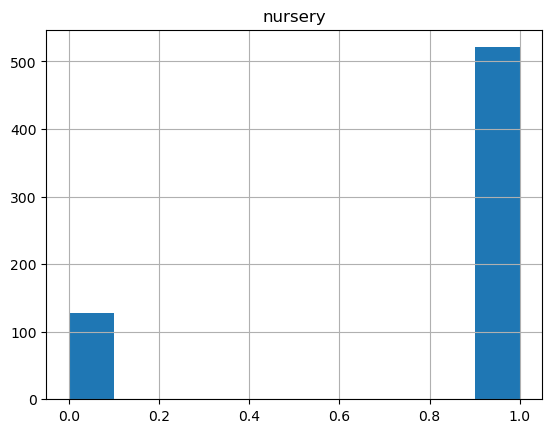

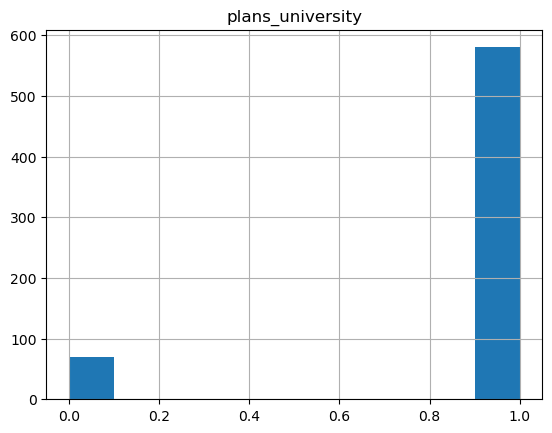

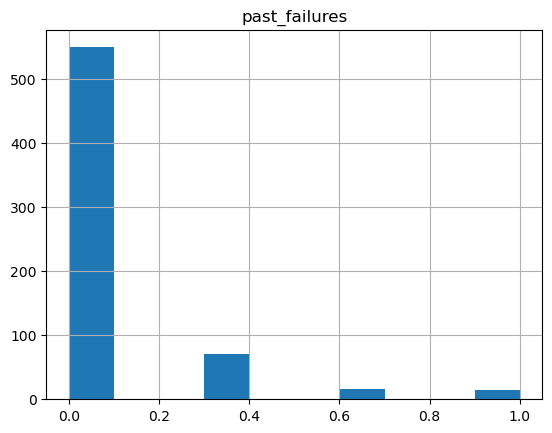

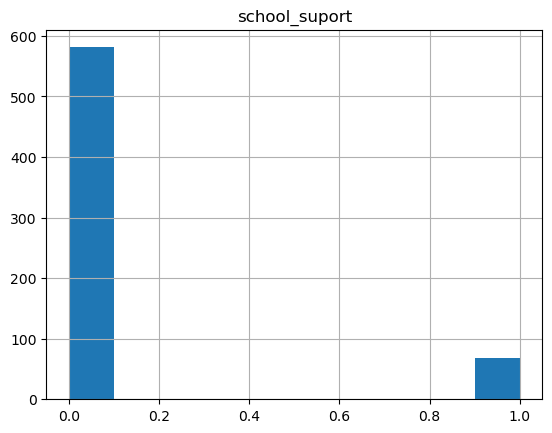

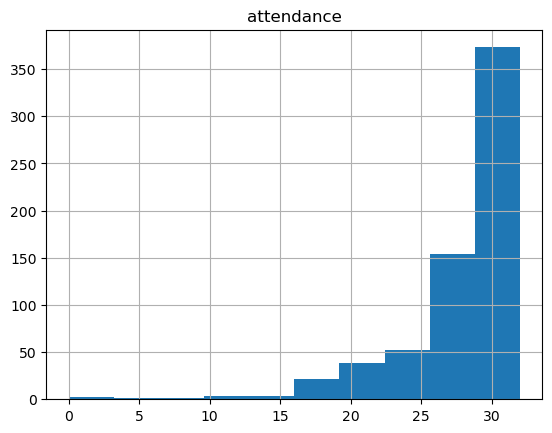

In [30]:
columns = data.columns.tolist()
for i in columns:
    data.hist(column=i, grid=True)

Странная гистограмма получается только у age и traveltime.

Посмотрим какие там большие значения у age. Оказывается иногда есть год рождения, а не возраст.
Посмотрим какие там большие значения у traveltime. Заменим их на среднее, когда больше 4

In [31]:
new_age = pd.read_csv('data.csv')['age']
for i in range(0, len(new_age)):
    new_age[i] = min(new_age[i], 2006 - new_age[i])
data['age'] = new_age

In [32]:
new_traveltime = pd.read_csv('data.csv')['traveltime']
s, cnt = 0, 0
for i in range(0, len(new_traveltime)):
    if 1 <= new_traveltime[i] <= 4:
        s += new_traveltime[i]
        cnt += 1
for i in range(0, len(new_traveltime)):
    if 1 > new_traveltime[i] or new_traveltime[i] > 4:
        new_traveltime[i] = s / cnt
data['traveltime'] = new_traveltime

Нормализуем данные снова

In [33]:
data = (data - data.min()) / (data.max() - data.min())
data[:5]

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,school_suport,attendance
0,0.142857,1.00,1.00,0.000000,0.333333,1.00,0.75,0.75,0.00,0.25,1.00,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.8125
1,0.285714,1.00,1.00,0.000000,0.000000,1.00,0.50,0.75,0.00,0.25,1.00,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.9375
2,0.142857,0.25,0.25,0.333333,0.000000,0.75,1.00,1.00,0.25,0.75,1.00,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0000
3,0.428571,0.25,0.50,0.333333,0.000000,0.50,0.75,0.75,0.25,0.75,0.75,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.6875
4,0.285714,0.50,0.25,0.333333,0.333333,0.75,0.25,1.00,0.00,0.25,1.00,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0000


__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказаниепосчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

[[4406.640692563136, 353], [4242.026953582433, 584], [3919.6617748542126, 614], [3744.5945945093104, 384], [3476.034151731318, 318], [3171.448710934885, 302], [3067.704548582692, 256], [2904.134482155968, 461], [2888.548895597735, 403], [2888.5022061030045, 422], [2322.174731285101, 556], [2302.347177189065, 491], [2299.389863403317, 230], [2237.8620571346128, 500], [1815.9809177404056, 136], [1787.7270083033025, 435], [1733.0888928670854, 286], [1445.2019639847872, 365], [1180.1105041106687, 195], [1119.516938525338, 261], [1104.9573163384155, 480], [997.4643072730423, 543], [902.0602825858157, 15], [900.0719874202115, 117], [872.1331830114192, 515], [834.6123861552576, 475], [824.5022512440347, 187], [817.2338585308657, 437], [815.0605339782505, 341], [747.3376350415311, 533], [745.7990759550979, 13], [737.9652858416064, 299], [735.5598177113086, 164], [729.8670534200605, 79], [697.3638631728317, 25], [683.8509785645718, 534], [668.165627403584, 135], [666.9098195244139, 264], [647.6

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,school_suport,attendance
350,0.285714,0.75,0.25,0.333333,0.000000,0.25,0.75,1.00,0.50,0.75,0.25,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.81250
351,0.428571,0.75,1.00,0.000000,0.333333,0.75,0.50,1.00,0.00,0.75,0.25,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.71875
352,0.428571,1.00,0.75,0.000000,1.000000,0.75,0.50,0.50,0.00,0.00,0.50,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.00000
353,0.142857,1.00,1.00,0.000000,0.000000,0.75,0.00,0.25,0.25,1.00,1.00,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.00000
354,0.428571,1.00,0.50,0.000000,0.333333,1.00,0.50,0.00,0.00,0.00,1.00,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.00000
355,0.000000,0.25,0.75,0.666667,0.000000,0.75,0.25,0.75,0.50,1.00,0.50,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.93750
356,0.428571,1.00,0.75,0.333333,0.333333,0.75,0.75,1.00,0.00,0.25,0.25,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.00000
357,0.428571,0.50,0.75,0.000000,1.000000,0.75,1.00,1.00,0.00,0.50,0.25,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.68750
358,0.000000,1.00,0.00,0.333333,1.000000,0.50,0.75,0.50,0.00,0.00,0.00,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.00000
359,0.142857,1.00,1.00,0.000000,0.000000,0.50,1.00,1.00,0.25,1.00,0.75,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.75000


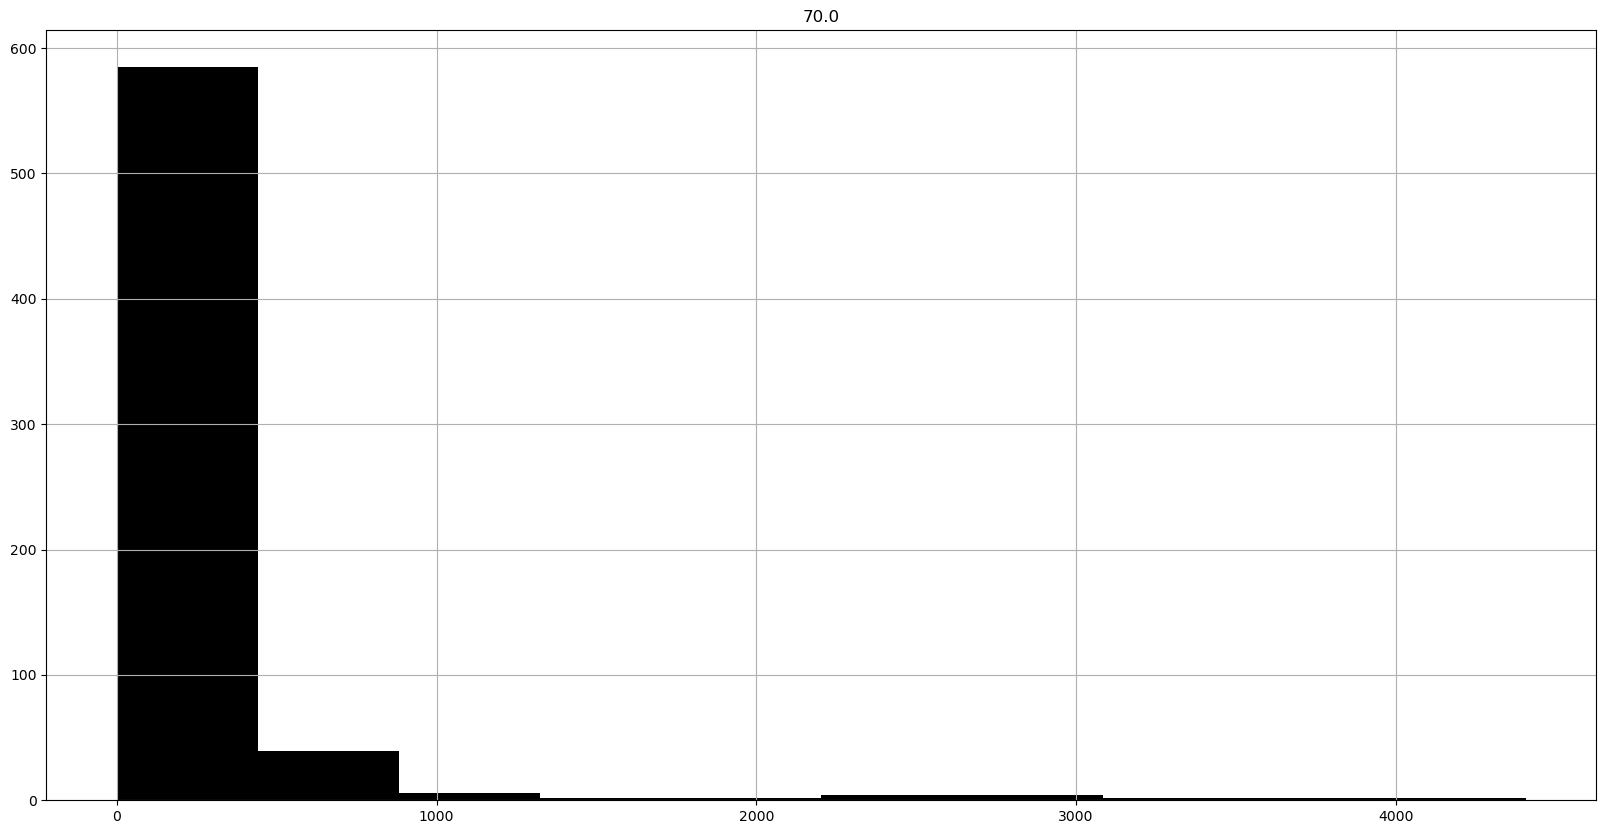

In [34]:
import sklearn
from sklearn import linear_model
regression = linear_model.LinearRegression().fit(data[1:], scores) #create model and train it
prediction = regression.predict(data[1:])
error = (prediction - scores) ** 2
error.hist(column='70.0', grid=True, figsize=(20, 10), color = 'black')
a = []
for i in range(0, len(error)):
    a.append([error['70.0'][i], i])
a.sort()
a.reverse()
print(a[:50])
print(scores)
data[350:360]

### Финальное предсказание и отчёт

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [35]:
scores = pd.read_csv("scores.csv")
l = LinearRegression()
result = cross_val_score(l, data[1:], scores)
print(result, sum(result) / len(result))

[0.25138665 0.29039107 0.13454663 0.26013885 0.1251016 ] 0.21231295949840093


Отчет:

Итоговое значение:(после того как убрала плохие значения)

При среднем в задаче 2: 0.2117182664709618

При медиане в задаче 2: 0.21231295949840093


Так что лучше использовать среднее и убирать выбросы. Без выбросов значение < 21